# Evaluation 2 
# Task 2
# Multi-class Classification of Football vs Rugby vs Tennis ball

## Import statements

In [ ]:
import os 
import tensorflow as tf
import pathlib
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.image as mimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Gathering the data

In [ ]:
# Descibing the data directory
for dir_path , dir_names , file_names in os.walk("/content/drive/MyDrive/Task_2/data"):
    print(f"There are {len(dir_names)} directories and {len(file_names)} images in {dir_path}")

There are 3 directories and 0 images in /content/drive/MyDrive/Task_2/data
There are 3 directories and 0 images in /content/drive/MyDrive/Task_2/data/test
There are 0 directories and 124 images in /content/drive/MyDrive/Task_2/data/test/rugby_ball
There are 0 directories and 151 images in /content/drive/MyDrive/Task_2/data/test/football
There are 0 directories and 123 images in /content/drive/MyDrive/Task_2/data/test/tennis_ball
There are 3 directories and 0 images in /content/drive/MyDrive/Task_2/data/evaluate
There are 0 directories and 3 images in /content/drive/MyDrive/Task_2/data/evaluate/tennis_ball
There are 0 directories and 3 images in /content/drive/MyDrive/Task_2/data/evaluate/rugby_ball
There are 0 directories and 3 images in /content/drive/MyDrive/Task_2/data/evaluate/football
There are 3 directories and 0 images in /content/drive/MyDrive/Task_2/data/train
There are 0 directories and 490 images in /content/drive/MyDrive/Task_2/data/train/tennis_ball
There are 0 directories

In [ ]:
# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Task_2/data/train/"
test_dir = "/content/drive/MyDrive/Task_2/data/test/"

In [ ]:
# Lets get the class names
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['football' 'rugby_ball' 'tennis_ball']


## Helper Functions

In [ ]:
# To view the random image from the dataset
def view_random_image(target_dir,target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder),1)[0]
    
    img = mimg.imread(target_folder+"/"+random_image)
    print(f"Image shape : {img.shape}")
    plt.imshow(img)
    plt.title(target_class)
    plt.figure()
    plt.axis(False)
    
    return img

In [ ]:
# Plot the loss and accuracy curves for train vs test
def plot_loss_curves(history):
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(train_loss))
    train_accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    plt.plot(epochs,train_loss,label="Training Loss")
    plt.plot(epochs,val_loss,label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.figure()
    
    plt.plot(epochs,train_accuracy,label="Training Accuracy")
    plt.plot(epochs,val_accuracy,label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.figure()

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

Image shape : (1300, 1950, 3)


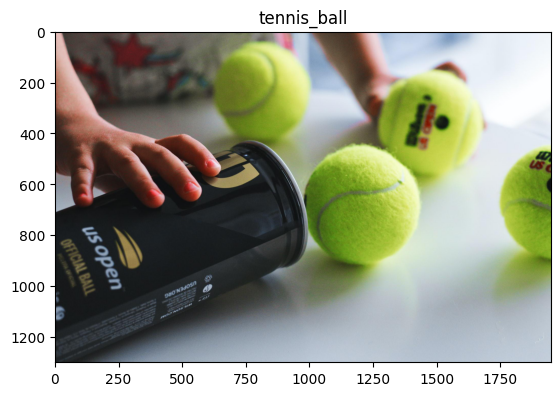

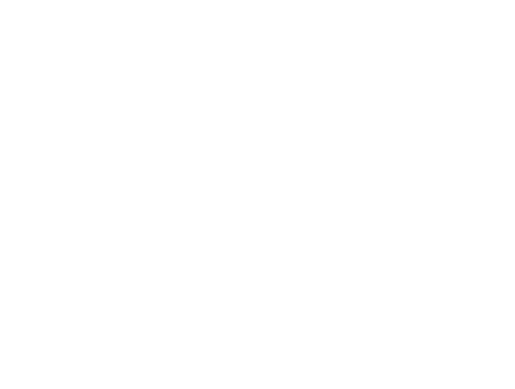

In [ ]:
# Visualize
img = view_random_image(target_dir = train_dir,target_class = random.choice(class_names))

## Preprocess of Data

In [ ]:
# Rescale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load the data in from the directories and turn into batches
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)
test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
)

Found 1587 images belonging to 3 classes.
Found 398 images belonging to 3 classes.


### **Tensorboard Callback**

In [ ]:
# Create tensorboard callback 
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## **Base Model using ANN**

Base Model

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(4, activation='relu'),
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 376s 7s/step - loss: 1.3135 - accuracy: 0.3239 - val_loss: 1.0980 - val_accuracy: 0.3794
Epoch 2/5
50/50 [==============================] - 20s 409ms/step - loss: 1.0975 - accuracy: 0.3806 - val_loss: 1.0969 - val_accuracy: 0.3794
Epoch 3/5
50/50 [==============================] - 22s 444ms/step - loss: 1.0965 - accuracy: 0.3806 - val_loss: 1.0961 - val_accuracy: 0.3794
Epoch 4/5
50/50 [==============================] - 22s 433ms/step - loss: 1.0956 - accuracy: 0.3806 - val_loss: 1.0954 - val_accuracy: 0.3794
Epoch 5/5
50/50 [==============================] - 22s 438ms/step - loss: 1.0951 - accuracy: 0.3806 - val_loss: 1.0949 - val_accuracy: 0.3794


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 4)                 602116    
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 3)                 15        
                                                                 
Total params: 602,151
Trainable params: 602,151
Non-trainable params: 0
_________________________________________________________________


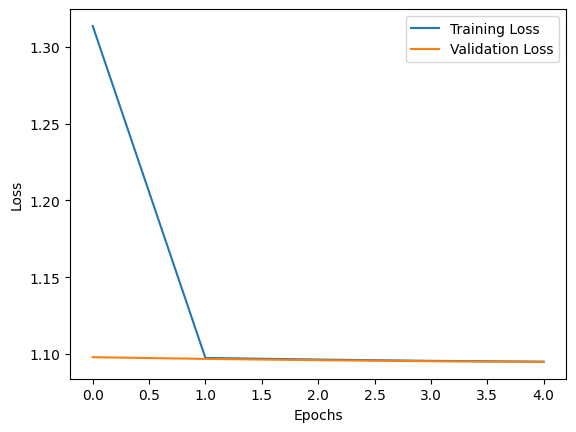

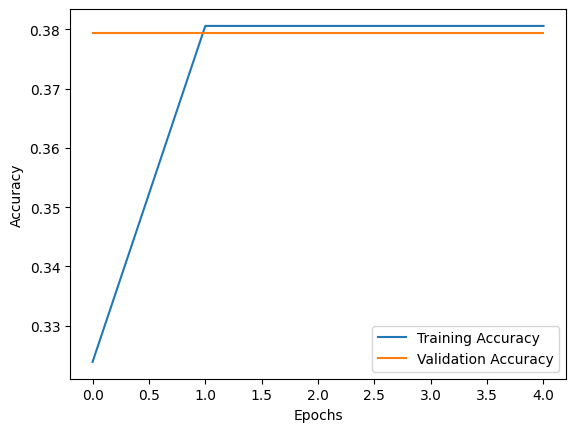

<Figure size 640x480 with 0 Axes>

In [ ]:
plot_loss_curves(history_1)

## Improving Base Model of ANN

In [15]:
# Set random seed
tf.random.set_seed(42)

# Create a model similar to model_1 but add an extra layer and increase the number of hidden units in each layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)), # dense layers expect a 1-dimensional vector as input
  tf.keras.layers.Dense(100, activation='relu'), # increase number of neurons from 4 to 100 (for each layer)
  tf.keras.layers.Dense(100, activation='relu'),
  tf.keras.layers.Dense(100, activation='relu'), # add an extra layer
  tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 34s 642ms/step - loss: 11.8180 - accuracy: 0.3623 - val_loss: 6.8007 - val_accuracy: 0.3769
Epoch 2/5
50/50 [==============================] - 22s 438ms/step - loss: 1.9381 - accuracy: 0.4928 - val_loss: 1.0190 - val_accuracy: 0.5678
Epoch 3/5
50/50 [==============================] - 21s 404ms/step - loss: 1.0718 - accuracy: 0.5331 - val_loss: 0.9390 - val_accuracy: 0.5628
Epoch 4/5
50/50 [==============================] - 23s 460ms/step - loss: 1.5305 - accuracy: 0.5085 - val_loss: 1.0438 - val_accuracy: 0.5402
Epoch 5/5
50/50 [==============================] - 21s 417ms/step - loss: 0.9207 - accuracy: 0.5803 - val_loss: 0.8363 - val_accuracy: 0.5980


In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_3 (Dense)             (None, 100)               15052900  
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 3)                 303       
                                                                 
Total params: 15,073,403
Trainable params: 15,073,403
Non-trainable params: 0
_________________________________________________________________


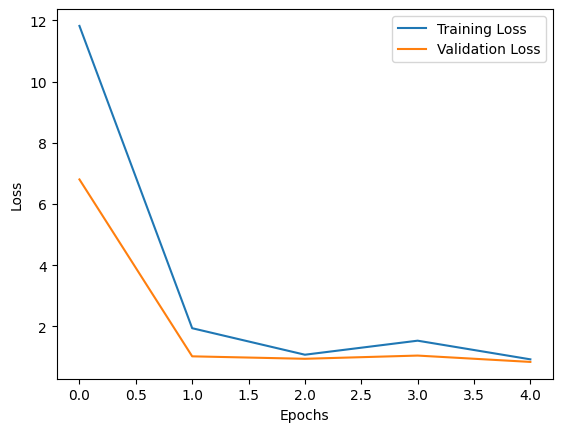

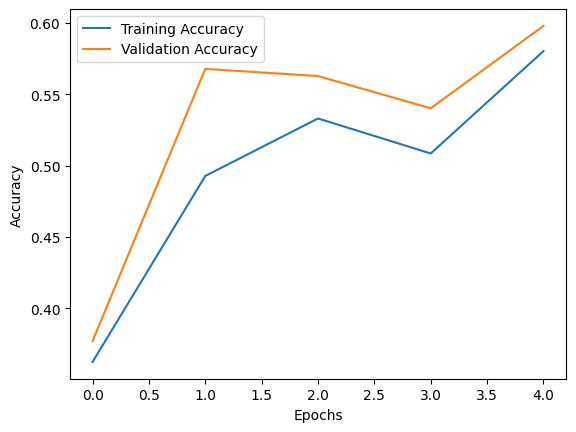

<Figure size 640x480 with 0 Axes>

In [17]:
plot_loss_curves(history_2)

# Models using CNN

## CNN models starting from baseline

In [18]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [19]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_3 = Sequential([
  Conv2D(filters=10, 
         kernel_size=3, 
         strides=1,
         padding='valid',
         activation='relu', 
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  Flatten(),
  Dense(3, activation='softmax') # output layer (specify output shape)
])
# Compile the model
model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
50/50 [==============================] - 31s 467ms/step - loss: 3.0359 - accuracy: 0.4379 - val_loss: 0.9492 - val_accuracy: 0.5101
Epoch 2/5
50/50 [==============================] - 22s 428ms/step - loss: 0.6445 - accuracy: 0.7555 - val_loss: 0.8035 - val_accuracy: 0.6206
Epoch 3/5
50/50 [==============================] - 22s 448ms/step - loss: 0.2906 - accuracy: 0.9212 - val_loss: 0.7291 - val_accuracy: 0.7010
Epoch 4/5
50/50 [==============================] - 21s 425ms/step - loss: 0.0946 - accuracy: 0.9830 - val_loss: 0.8006 - val_accuracy: 0.7337
Epoch 5/5
50/50 [==============================] - 23s 458ms/step - loss: 0.0266 - accuracy: 0.9981 - val_loss: 0.9371 - val_accuracy: 0.7487


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_2 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_7 (Dense)             (None, 3)                 1425723   
                                                                 
Total params: 1,427,823
Trainable params: 1,427,823
Non-trainable params: 0
_________________________________________________________________


In [21]:
model_3.evaluate(test_data)

13/13 [==============================] - 4s 286ms/step - loss: 0.9371 - accuracy: 0.7487


[0.9371275901794434, 0.7487437129020691]

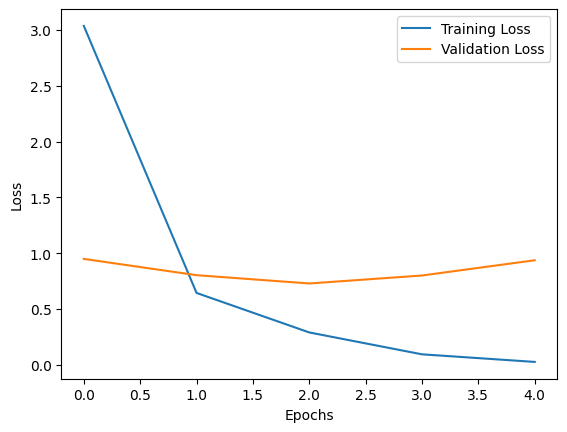

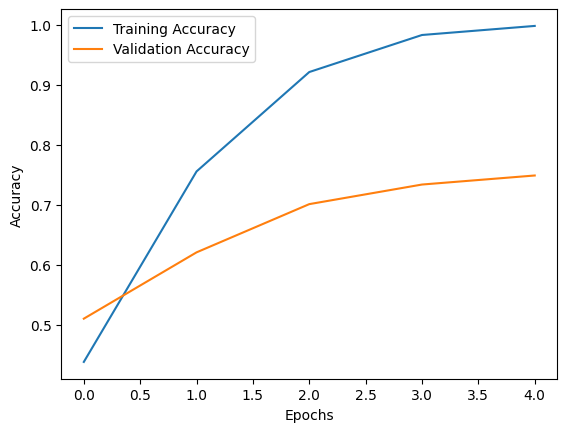

<Figure size 640x480 with 0 Axes>

In [22]:
plot_loss_curves(history_3)

## Improving the CNN base model

In [23]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(3, activation='softmax')
])
# Compile model (same as model_4)
model_4.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])
# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
50/50 [==============================] - 24s 425ms/step - loss: 0.9483 - accuracy: 0.5016 - val_loss: 0.8154 - val_accuracy: 0.6432
Epoch 2/5
50/50 [==============================] - 22s 437ms/step - loss: 0.7685 - accuracy: 0.6541 - val_loss: 0.7865 - val_accuracy: 0.6658
Epoch 3/5
50/50 [==============================] - 23s 457ms/step - loss: 0.6948 - accuracy: 0.7007 - val_loss: 0.7399 - val_accuracy: 0.6307
Epoch 4/5
50/50 [==============================] - 20s 410ms/step - loss: 0.6169 - accuracy: 0.7347 - val_loss: 0.7341 - val_accuracy: 0.6482
Epoch 5/5
50/50 [==============================] - 22s 439ms/step - loss: 0.5436 - accuracy: 0.7807 - val_loss: 0.7007 - val_accuracy: 0.6935


In [24]:
# Check out the model architecture
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)      

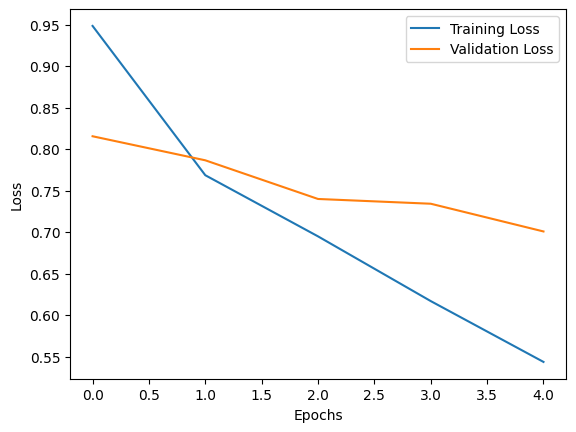

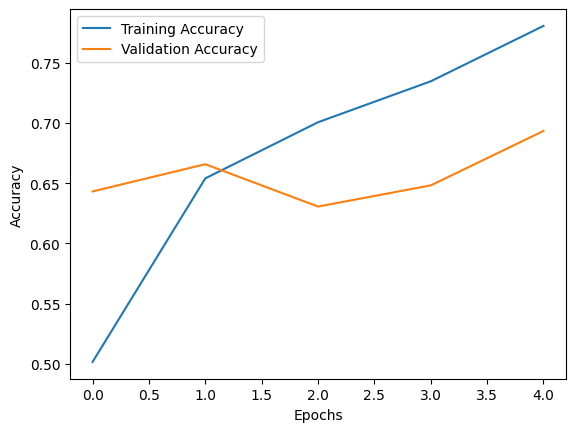

<Figure size 640x480 with 0 Axes>

In [25]:
# Plot loss curves of model_5 results
plot_loss_curves(history_4)

## Improving CNN model by using an existing architecture

In [26]:
# Create a CNN model (same as Tiny VGG - https://poloclub.github.io/cnn-explainer/)

tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, 
                          activation="relu", 
                          input_shape=(224, 224, 3)), 
                          # first layer specifies input shape (height, width, colour channels)

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"), # padding can also be 'same'

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), 
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(), # Flatten the input
    tf.keras.layers.Dense(3, activation="softmax") # Categorical activation output
  ])

# Compile the model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
path = "model_checkpoints/model_5/mdl5.ckpt"

history_5 = model_5.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        callbacks = [tf.keras.callbacks.ModelCheckpoint(path,save_best_only=True,
                                                                       save_weights_only=True),
                                    create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                            experiment_name="model_5")])

Saving TensorBoard log files to: tensorflow_hub/model_5/20230421-121631
Epoch 1/10
50/50 [==============================] - 23s 426ms/step - loss: 0.9886 - accuracy: 0.4770 - val_loss: 0.8963 - val_accuracy: 0.5804
Epoch 2/10
50/50 [==============================] - 22s 452ms/step - loss: 0.7750 - accuracy: 0.6711 - val_loss: 0.7645 - val_accuracy: 0.6935
Epoch 3/10
50/50 [==============================] - 22s 451ms/step - loss: 0.5561 - accuracy: 0.7902 - val_loss: 0.7175 - val_accuracy: 0.6784
Epoch 4/10
50/50 [==============================] - 22s 447ms/step - loss: 0.4018 - accuracy: 0.8570 - val_loss: 0.7963 - val_accuracy: 0.6508
Epoch 5/10
50/50 [==============================] - 21s 424ms/step - loss: 0.2460 - accuracy: 0.9238 - val_loss: 0.7900 - val_accuracy: 0.7211
Epoch 6/10
50/50 [==============================] - 22s 449ms/step - loss: 0.1302 - accuracy: 0.9616 - val_loss: 0.9377 - val_accuracy: 0.7186
Epoch 7/10
50/50 [==============================] - 22s 442ms/step - l

In [27]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_7 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_9 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

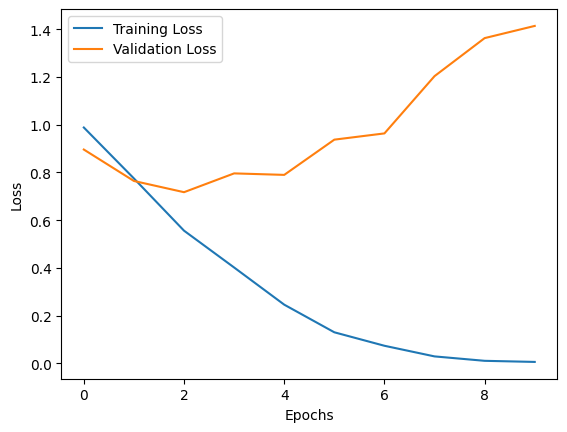

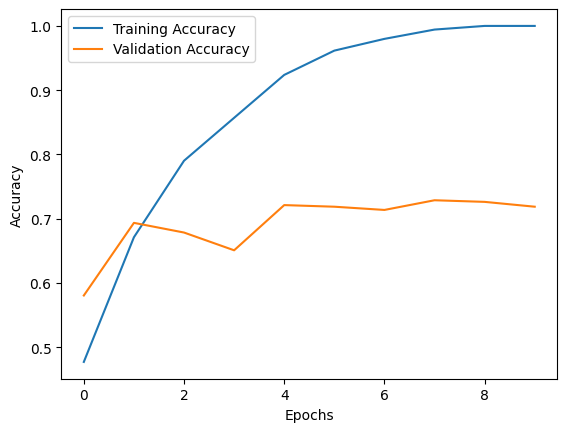

<Figure size 640x480 with 0 Axes>

In [28]:
plot_loss_curves(history_5)

In [29]:
# Loading weights from Model Checkpointing
model_5.load_weights(path)

In [30]:
# Evaluating our model
train_eval = model_5.evaluate(train_data)
test_eval = model_5.evaluate(test_data)
print(f"Train Evaluation [loss,accuracy] = {train_eval}")
print(f"Test Evaluation [ loss , accuracy] = {test_eval}")

13/13 [==============================] - 5s 368ms/step - loss: 0.7175 - accuracy: 0.6784
Train Evaluation [loss,accuracy] = [0.40359818935394287, 0.8872085809707642]
Test Evaluation [ loss , accuracy] = [0.7174587249755859, 0.6783919334411621]


# Improving furthur by trying data augmentation

In [31]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, 
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2, 
                                             height_shift_range=0.2, 
                                             horizontal_flip=True) 
# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [32]:
# Import data and augment it from training directory
print("Augmented training images:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='categorical',
                                                                   shuffle=False) 
                                                                   # Don't shuffle for demonstration purposes, usually a good thing to shuffle

# Create non-augmented data batches
print("Non-augmented training images:")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=False) # Don't shuffle for demonstration purposes

print("Unchanged test images:")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Augmented training images:
Found 1587 images belonging to 3 classes.
Non-augmented training images:
Found 1587 images belonging to 3 classes.
Unchanged test images:
Found 398 images belonging to 3 classes.


In [33]:
# Get data batch samples
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() 

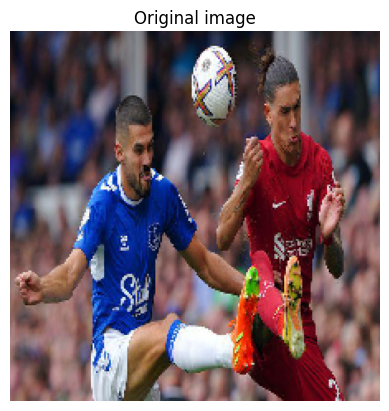

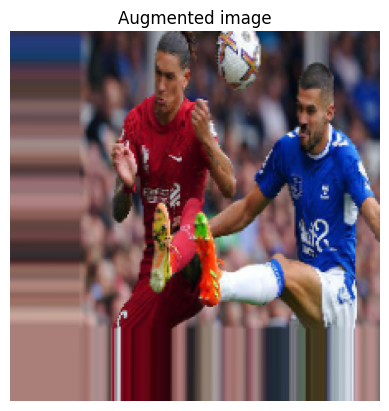

In [34]:
# Show original image and augmented image
random_number = random.randint(0, 31) # we're making batches of size 32, so we'll get a random instance
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

Create model using augmented images

In [35]:
tf.random.set_seed(42)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, 
                          activation="relu", 
                          input_shape=(224, 224, 3)), 
                          # first layer specifies input shape (height, width, colour channels)

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"), # padding can also be 'same'

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"), 
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(), # Flatten the input
    tf.keras.layers.Dense(3, activation="softmax") # Categorical activation output
  ])

# Compile the model
model_6.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
# Fit the model
path = "model_checkpoints/model_6/mdl6.ckpt"

history_6 = model_6.fit(train_data_augmented,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data),
                        initial_epoch=5,
                        callbacks = [tf.keras.callbacks.ModelCheckpoint(path,save_best_only=True,
                                                                       save_weights_only=True),
                                    create_tensorboard_callback(dir_name="tensorflow_hub",
                                                            experiment_name="model_6")])

Saving TensorBoard log files to: tensorflow_hub/model_6/20230421-122154
Epoch 6/10
50/50 [==============================] - 40s 762ms/step - loss: 1.2585 - accuracy: 0.2949 - val_loss: 1.0983 - val_accuracy: 0.3869
Epoch 7/10
50/50 [==============================] - 44s 879ms/step - loss: 1.0993 - accuracy: 0.2583 - val_loss: 1.0975 - val_accuracy: 0.3819
Epoch 8/10
50/50 [==============================] - 39s 778ms/step - loss: 1.0971 - accuracy: 0.3365 - val_loss: 1.0779 - val_accuracy: 0.3794
Epoch 9/10
50/50 [==============================] - 38s 759ms/step - loss: 1.1029 - accuracy: 0.3749 - val_loss: 1.0985 - val_accuracy: 0.3618
Epoch 10/10
50/50 [==============================] - 37s 743ms/step - loss: 1.1607 - accuracy: 0.3251 - val_loss: 1.0966 - val_accuracy: 0.3794


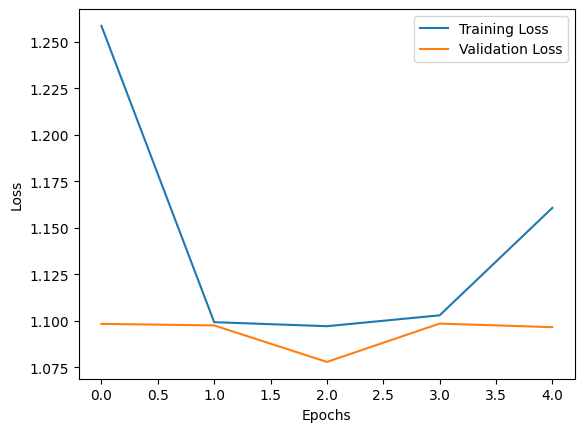

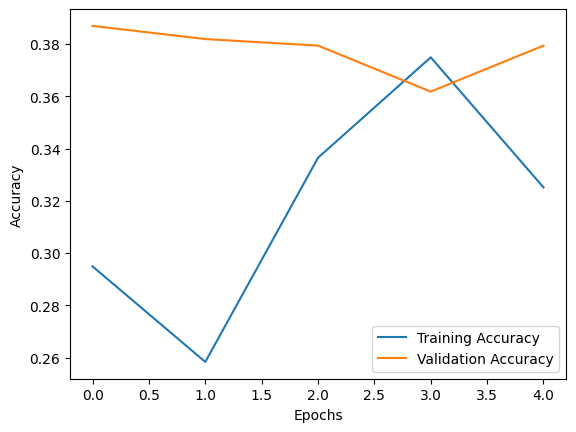

<Figure size 640x480 with 0 Axes>

In [36]:
# Check model's performance history training on augmented data
plot_loss_curves(history_6)

# Transfer Learning

In [37]:
# Create data inputs
import tensorflow as tf
IMG_SIZE = (224, 224) # define image size
train_data_idfd = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode="categorical",
                                                                           batch_size=32,
                                                                           image_size=IMG_SIZE)
test_data_idfd = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                label_mode="categorical",
                                                                image_size=IMG_SIZE)

Found 1587 files belonging to 3 classes.
Found 398 files belonging to 3 classes.


In [38]:
# Check the training data datatype
train_data_idfd

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

In [39]:
# Check out the class names of our dataset
train_data_idfd.class_names

['football', 'rugby_ball', 'tennis_ball']

In [40]:
# See an example batch of data
for images, labels in train_data_idfd.take(1):
  print(images, labels)

tf.Tensor(
[[[[199.       215.       214.      ]
   [199.       215.       214.      ]
   [199.53572  215.53572  214.53572 ]
   ...
   [202.62518  228.55365  222.08942 ]
   [202.32147  234.35706  225.67853 ]
   [188.66986  228.4555   217.4555  ]]

  [[199.       215.       214.      ]
   [199.       215.       214.      ]
   [199.53572  215.53572  214.53572 ]
   ...
   [206.14307  236.14307  228.14307 ]
   [197.96442  230.32147  221.64294 ]
   [192.33038  230.11603  219.2232  ]]

  [[200.       216.       215.      ]
   [200.       216.       215.      ]
   [200.13393  216.13393  215.13393 ]
   ...
   [204.26788  235.26788  227.26788 ]
   [200.47331  231.81258  223.64294 ]
   [192.88397  229.33038  219.10718 ]]

  ...

  [[149.20535  196.0982   160.0982  ]
   [162.71428  201.4107   170.24107 ]
   [169.99107  199.5357   172.89285 ]
   ...
   [172.27664  218.34818  184.81241 ]
   [171.2589   216.2589   183.2589  ]
   [174.35718  218.35718  185.35718 ]]

  [[148.99107  193.49107  158.2410

In [41]:
# 1. Create base model with tf.keras.applications
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

# 2. Freeze the base model 
base_model.trainable = False

# 3. Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 5. Pass the inputs to the base_model
x = base_model(inputs,training =True)
# Check data shape after passing it to base_model
print(f"Shape after base_model: {x.shape}")

# 6. Average pool the outputs of the base model
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"After GlobalAveragePooling2D(): {x.shape}")

# 7. Create the output activation layer
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)

# 8. Combine the inputs with the outputs into a model
model_0 = tf.keras.Model(inputs, outputs)

# 9. Compile the model
model_0.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 10. Fit the model
history_0_fe = model_0.fit(train_data_idfd,
                                 epochs=5,
                                 steps_per_epoch=len(train_data_idfd),
                                 validation_data=test_data_idfd,
                                 validation_steps=int(0.25 * len(test_data_idfd)), 
                                 callbacks=[create_tensorboard_callback("transfer_learning", "10_percent_feature_extract")])

16705208/16705208 [==============================] - 0s 0us/step


Shape after base_model: (None, 7, 7, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: transfer_learning/10_percent_feature_extract/20230421-122747
Epoch 1/5
50/50 [==============================] - 18s 222ms/step - loss: 0.4678 - accuracy: 0.8626 - val_loss: 0.1698 - val_accuracy: 0.9896
Epoch 2/5
50/50 [==============================] - 9s 169ms/step - loss: 0.1916 - accuracy: 0.9515 - val_loss: 0.1737 - val_accuracy: 0.9375
Epoch 3/5
50/50 [==============================] - 8s 145ms/step - loss: 0.1362 - accuracy: 0.9641 - val_loss: 0.1328 - val_accuracy: 0.9583
Epoch 4/5
50/50 [==============================] - 8s 139ms/step - loss: 0.1130 - accuracy: 0.9704 - val_loss: 0.0982 - val_accuracy: 0.9688
Epoch 5/5
50/50 [==============================] - 9s 150ms/step - loss: 0.0970 - accuracy: 0.9767 - val_loss: 0.0884 - val_accuracy: 0.9792


In [42]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name)

0 input_1
1 rescaling
2 normalization
3 rescaling_1
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_activation
5

In [43]:
base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 rescaling (Rescaling)          (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 normalization (Normalization)  (None, None, None,   7           ['rescaling[0][0]']              
                                3)                                                   

In [44]:
# Check summary of model constructed with Functional API
model_0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainable params: 4,049,571
_________________________________________________________________


## Adding data augemntation to the Transfer learning base model

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential([
  preprocessing.RandomFlip("horizontal"),
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
], name ="data_augmentation")

In [97]:
# Setup input shape and base model, freezing the base model layers
input_shape = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable = False

# Create input layer
inputs = layers.Input(shape=input_shape, name="input_layer")

# # Add in data augmentation Sequential model as a layer
# x = data_augmentation(inputs)

# Give base_model inputs (after augmentation) and don't train it
x = base_model(inputs,training=True)

# Pool output features of base model
x = layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Put a dense layer on as the output
outputs = layers.Dense(3, activation="softmax", name="output_layer")(x)

# Make a model with inputs and outputs
model_1 = keras.Model(inputs, outputs)

# Compile the model
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1_fe = model_1.fit(train_data_idfd,
                    epochs=5,
                    steps_per_epoch=len(train_data_idfd),
                    validation_data=test_data_idfd,
                    validation_steps=int(0.25*len(test_data_idfd)),
                    callbacks=[create_tensorboard_callback("transfer_learning", "without data_aug")])

Saving TensorBoard log files to: transfer_learning/without data_aug/20230421-125913


Epoch 1/5
50/50 [==============================] - 17s 179ms/step - loss: 0.5091 - accuracy: 0.8192 - val_loss: 0.2313 - val_accuracy: 0.9688
Epoch 2/5
50/50 [==============================] - 9s 170ms/step - loss: 0.1998 - accuracy: 0.9496 - val_loss: 0.1711 - val_accuracy: 0.9896
Epoch 3/5
50/50 [==============================] - 9s 158ms/step - loss: 0.1514 - accuracy: 0.9584 - val_loss: 0.0993 - val_accuracy: 0.9896
Epoch 4/5
50/50 [==============================] - 8s 144ms/step - loss: 0.1227 - accuracy: 0.9704 - val_loss: 0.1429 - val_accuracy: 0.9479
Epoch 5/5
50/50 [==============================] - 10s 166ms/step - loss: 0.1008 - accuracy: 0.9767 - val_loss: 0.0925 - val_accuracy: 0.9688


In [98]:
# Check out model summary
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainable params: 4,049,571
_________________________________________________________________


In [99]:
# Evaluate on the test data
results_1 = model_1.evaluate(test_data_idfd)
results_1

13/13 [==============================] - 2s 80ms/step - loss: 0.1101 - accuracy: 0.9648


[0.11008750647306442, 0.9648241400718689]

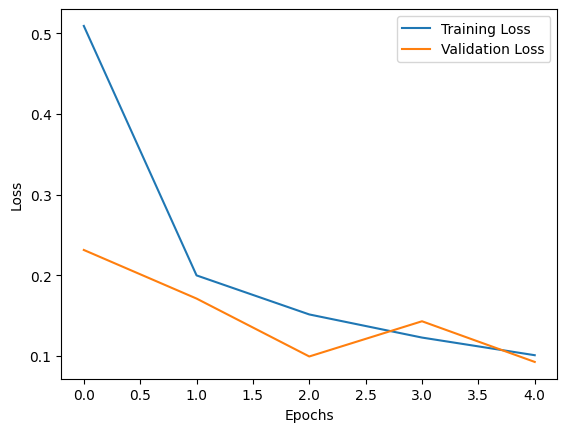

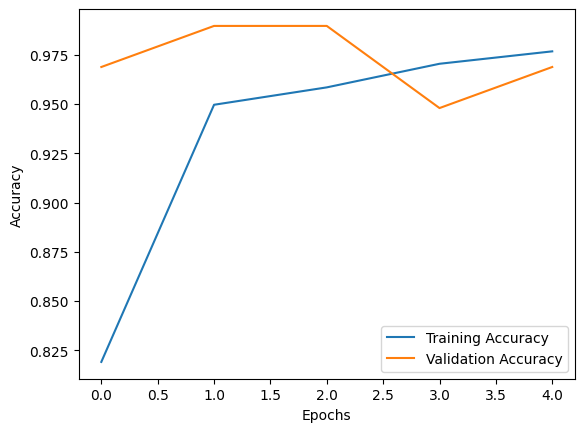

<Figure size 640x480 with 0 Axes>

In [100]:
# How does the model go with a data augmentation layer with 1% of data
plot_loss_curves(history_1_fe)

In [101]:
# Layers in loaded model
model_1.layers

In [102]:
for layer in model_1.layers:
  print(layer.trainable)

True
False
True
True


In [103]:
model_1.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 3)                 3843      
                                                                 
Total params: 4,053,414
Trainable params: 3,843
Non-trainable params: 4,049,571
_________________________________________________________________


## Fine tuning the Final Model_1

In [85]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [86]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

# Recompile the model (always recompile after any adjustments to a model)
model_1.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(lr=0.0001), # lr is 10x lower than before for fine-tuning
              metrics=["accuracy"])

In [87]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_3 False
1 rescaling_4 False
2 normalization_2 False
3 rescaling_5 False
4 stem_conv_pad False
5 stem_conv False
6 stem_bn False
7 stem_activation False
8 block1a_dwconv False
9 block1a_bn False
10 block1a_activation False
11 block1a_se_squeeze False
12 block1a_se_reshape False
13 block1a_se_reduce False
14 block1a_se_expand False
15 block1a_se_excite False
16 block1a_project_conv False
17 block1a_project_bn False
18 block2a_expand_conv False
19 block2a_expand_bn False
20 block2a_expand_activation False
21 block2a_dwconv_pad False
22 block2a_dwconv False
23 block2a_bn False
24 block2a_activation False
25 block2a_se_squeeze False
26 block2a_se_reshape False
27 block2a_se_reduce False
28 block2a_se_expand False
29 block2a_se_excite False
30 block2a_project_conv False
31 block2a_project_bn False
32 block2b_expand_conv False
33 block2b_expand_bn False
34 block2b_expand_activation False
35 block2b_dwconv False
36 block2b_bn False
37 block2b_activation False
38 block2b_se_squeeze Fals

In [88]:
print(len(model_1.trainable_variables))

12


In [110]:
# Fine tune for another 5 epochs
initial_epochs = 5
fine_tune_epochs = initial_epochs + 5

# Refit the model
history_1_fine= model_1.fit(train_data_idfd,
                            epochs=fine_tune_epochs,
                            validation_data=test_data_idfd,
                            initial_epoch=history_1_fe.epoch[-1], 
                            validation_steps=len(test_data_idfd),
                            callbacks=[create_tensorboard_callback("transfer_learning", "fine_tune_all_data")]) 

Saving TensorBoard log files to: transfer_learning/fine_tune_all_data/20230421-130556
Epoch 5/10
50/50 [==============================] - 9s 165ms/step - loss: 0.0411 - accuracy: 0.9962 - val_loss: 1.3972 - val_accuracy: 0.2708
Epoch 6/10
50/50 [==============================] - 8s 147ms/step - loss: 0.0416 - accuracy: 0.9931 - val_loss: 1.4242 - val_accuracy: 0.3333
Epoch 7/10
50/50 [==============================] - 10s 181ms/step - loss: 0.0383 - accuracy: 0.9950 - val_loss: 1.4870 - val_accuracy: 0.3125
Epoch 8/10
50/50 [==============================] - 10s 177ms/step - loss: 0.0356 - accuracy: 0.9950 - val_loss: 1.4510 - val_accuracy: 0.3333
Epoch 9/10
50/50 [==============================] - 8s 141ms/step - loss: 0.0316 - accuracy: 0.9956 - val_loss: 1.3585 - val_accuracy: 0.3542
Epoch 10/10
50/50 [==============================] - 10s 174ms/step - loss: 0.0294 - accuracy: 0.9981 - val_loss: 1.6098 - val_accuracy: 0.3021


In [111]:
# Evaluate the model on the test data
results_fine_tune_all_data = model_1.evaluate(test_data_idfd)

13/13 [==============================] - 2s 77ms/step - loss: 0.0735 - accuracy: 0.9774


5
11
[0.8191556334495544, 0.9495904445648193, 0.9584121108055115, 0.9703843593597412, 0.9766855835914612, 0.996219277381897, 0.9930686950683594, 0.9949590563774109, 0.9949590563774109, 0.9955891370773315, 0.9981096386909485]


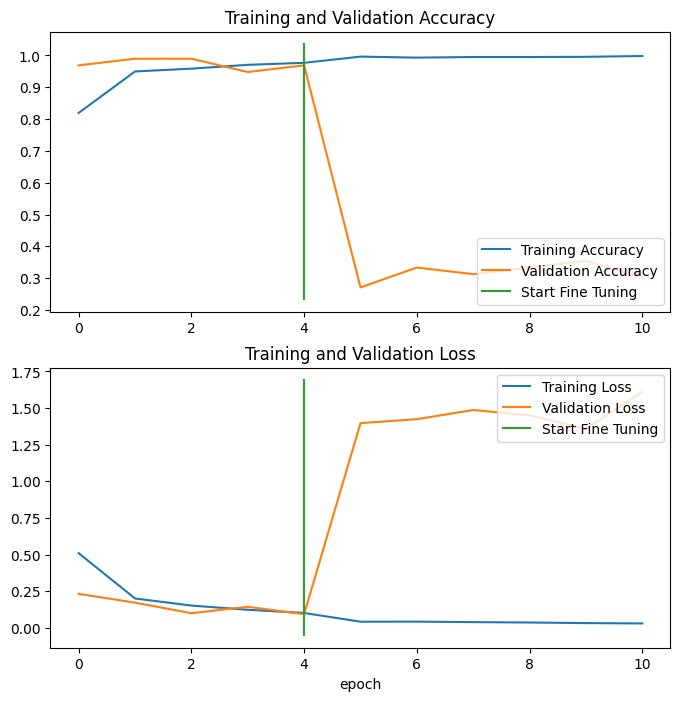

In [112]:
compare_historys(original_history=history_1_fe, 
                 new_history=history_1_fine, 
                 initial_epochs=5)

# **Evaluate the final model on unseen data**

In [113]:
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
eval_datagen = ImageDataGenerator(rescale=1./255)
eval_dir = "/content/drive/MyDrive/Task_2/data/evaluate/"

In [114]:
# Import data from directories and turn it into batches
eval_data = eval_datagen.flow_from_directory(eval_dir,
                                               batch_size=8, # number of images to process at a time 
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="categorical",
                                               shuffle = True , 
                                               seed=42)

Found 30 images belonging to 3 classes.


In [115]:
eval_data.class_indices

{'football': 0, 'rugby_ball': 1, 'tennis_ball': 2}

In [116]:
# Model 1 Evaluation on unseen data
model_1.evaluate(eval_data)

4/4 [==============================] - 1s 67ms/step - loss: 1.4867 - accuracy: 0.3333


[1.4866889715194702, 0.3333333432674408]

In [117]:
# Model_2 evaluation on useen data
model_2.evaluate(eval_data)

4/4 [==============================] - 0s 76ms/step - loss: 0.6161 - accuracy: 0.7000


[0.6160994172096252, 0.699999988079071]

Task 2 Completed